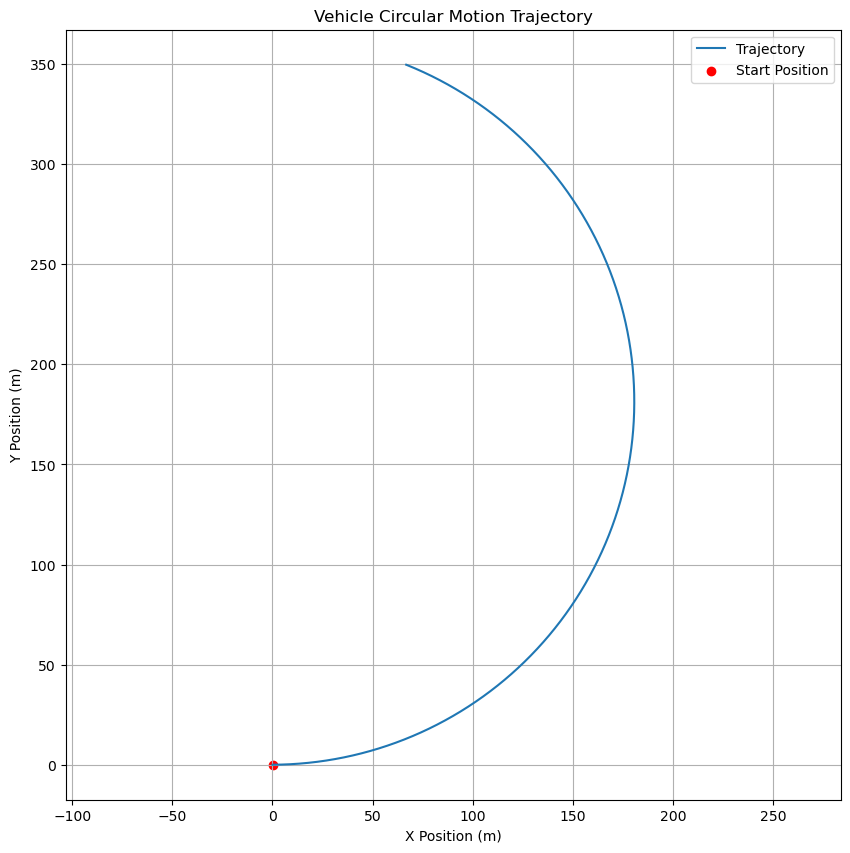

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math

class Vehicle:
    def __init__(self, x, y, delta, vel, dt):
        self.vel = vel
        self.x = x
        self.y = y
        self.delta = delta
        self.dt = dt
        self.beta = 0 
        self.r = 0  
        self.yaw = 0  


        self.length = 2.338
        self.width = 1.381
        self.rear_to_wheel = 0.339
        self.wheel_length = 0.531
        self.wheel_width = 0.125
        self.track = 1.094
        self.wheel_base = 1.686
        self.Caf = 2*32857.5
        self.Car = 2*32857.5
        self.mass = 633
        self.lf = 0.9442
        self.lr = 0.7417
        self.Iz = 430.166


    
    def Motion_model(self):
        def deg_to_rad(deg):
            return deg * math.pi / 180
        
        coefficient_A = np.array([
            [-1*(self.Caf + self.Car) / (self.mass * self.vel), ((self.Car * self.lr - self.Caf * self.lf) / (self.mass * self.vel**2)) - 1],
            [(self.Car * self.lr - self.Caf * self.lf) / self.Iz, -(self.Caf * self.lf**2 + self.Car * self.lr**2) / (self.Iz * self.vel)]
        ])
        
        state_vector = np.array([[self.beta], [self.r]])

        coefficient_B = np.array([
            [self.Caf / (self.mass * self.vel)],
            [self.Caf * self.lf / self.Iz]
        ])

        control_matrix = np.array([[self.delta]])
        
        output_matrix = np.dot(coefficient_A, state_vector) + np.dot(coefficient_B, control_matrix)

        beta_dot = output_matrix[0][0]
        r_dot = output_matrix[1][0]

        self.beta += beta_dot * self.dt
        self.r += r_dot * self.dt
        self.yaw += self.r * self.dt


        
        if self.yaw > 180:
            self.yaw -= 360
        elif self.yaw < -180:
            self.yaw += 360

        #self.beta = np.mod(self.beta + np.pi, 2 * np.pi) - np.pi

        #self.r = np.mod(self.r + np.pi, 2 * np.pi) - np.pi
        #self.yaw = np.mod(self.yaw + np.pi, 2 * np.pi) - np.pi


        x_dot = self.vel * math.cos(deg_to_rad(self.yaw + self.beta))
        y_dot = self.vel * math.sin(deg_to_rad(self.yaw + self.beta))
        self.x += x_dot * self.dt
        self.y += y_dot * self.dt

def simulate_vehicle():
    x_init = 0
    y_init = 0
    delta = np.radians(30)
    vel = 5
    dt = 0.01
    total_time = 100
    
    vehicle = Vehicle(x_init, y_init, delta, vel, dt)
    
    x_positions = []
    y_positions = []
    
    for _ in np.arange(0, total_time, dt):
        vehicle.Motion_model()
        x_positions.append(vehicle.x)
        y_positions.append(vehicle.y)
    
    plt.figure(figsize=(10, 10))
    plt.plot(x_positions, y_positions, label="Trajectory")
    plt.scatter(x_positions[0], y_positions[0], color='red', label="Start Position")
    plt.title("Vehicle Circular Motion Trajectory")
    plt.xlabel("X Position (m)")
    plt.ylabel("Y Position (m)")
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

simulate_vehicle()

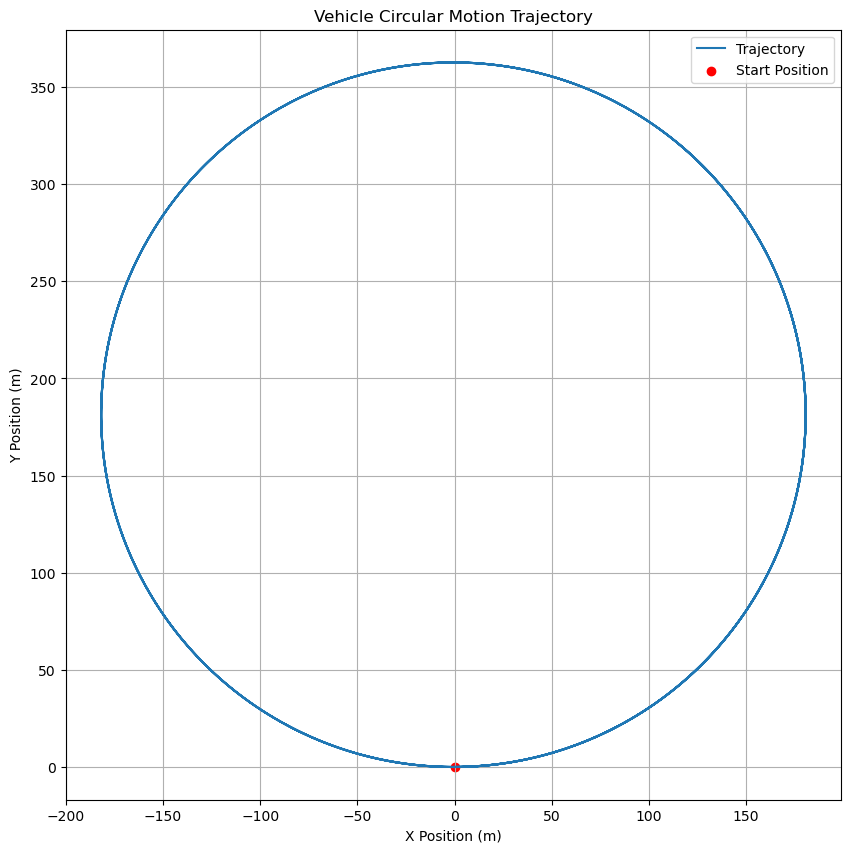

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math

class Vehicle:
    def __init__(self, x, y, delta, vel, dt):
        self.vel = vel
        self.x = x
        self.y = y
        self.delta = delta
        self.dt = dt
        self.beta = 0 
        self.r = 0  
        self.yaw = 0  


        self.length = 2.338
        self.width = 1.381
        self.rear_to_wheel = 0.339
        self.wheel_length = 0.531
        self.wheel_width = 0.125
        self.track = 1.094
        self.wheel_base = 1.686
        self.Caf = 2*32857.5
        self.Car = 2*32857.5
        self.mass = 633
        self.lf = 0.9442
        self.lr = 0.7417
        self.Iz = 430.166


    
    def Motion_model(self):
        def deg_to_rad(deg):
            return deg * math.pi / 180
        
        coefficient_A = np.array([
            [-1*(self.Caf + self.Car) / (self.mass * self.vel), ((self.Car * self.lr - self.Caf * self.lf) / (self.mass * self.vel**2)) - 1],
            [(self.Car * self.lr - self.Caf * self.lf) / self.Iz, -(self.Caf * self.lf**2 + self.Car * self.lr**2) / (self.Iz * self.vel)]
        ])
        
        state_vector = np.array([[self.beta], [self.r]])

        coefficient_B = np.array([
            [self.Caf / (self.mass * self.vel)],
            [self.Caf * self.lf / self.Iz]
        ])

        control_matrix = np.array([[self.delta]])
        
        output_matrix = np.dot(coefficient_A, state_vector) + np.dot(coefficient_B, control_matrix)

        beta_dot = output_matrix[0][0]
        r_dot = output_matrix[1][0]

        self.beta += beta_dot * self.dt
        self.r += r_dot * self.dt
        self.yaw += self.r * self.dt


        
        if self.yaw > 180:
            self.yaw -= 360
        elif self.yaw < -180:
            self.yaw += 360

        #self.beta = np.mod(self.beta + np.pi, 2 * np.pi) - np.pi

        #self.r = np.mod(self.r + np.pi, 2 * np.pi) - np.pi
        #self.yaw = np.mod(self.yaw + np.pi, 2 * np.pi) - np.pi


        x_dot = self.vel * math.cos(deg_to_rad(self.yaw + self.beta))
        y_dot = self.vel * math.sin(deg_to_rad(self.yaw + self.beta))
        self.x += x_dot * self.dt
        self.y += y_dot * self.dt

def simulate_vehicle():
    x_init = 0
    y_init = 0
    delta = np.radians(30)
    vel = 5
    dt = 0.01
    total_time = 1000
    
    vehicle = Vehicle(x_init, y_init, delta, vel, dt)
    
    x_positions = []
    y_positions = []
    
    for _ in np.arange(0, total_time, dt):
        vehicle.Motion_model()
        x_positions.append(vehicle.x)
        y_positions.append(vehicle.y)
    
    plt.figure(figsize=(10, 10))
    plt.plot(x_positions, y_positions, label="Trajectory")
    plt.scatter(x_positions[0], y_positions[0], color='red', label="Start Position")
    plt.title("Vehicle Circular Motion Trajectory")
    plt.xlabel("X Position (m)")
    plt.ylabel("Y Position (m)")
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

simulate_vehicle()

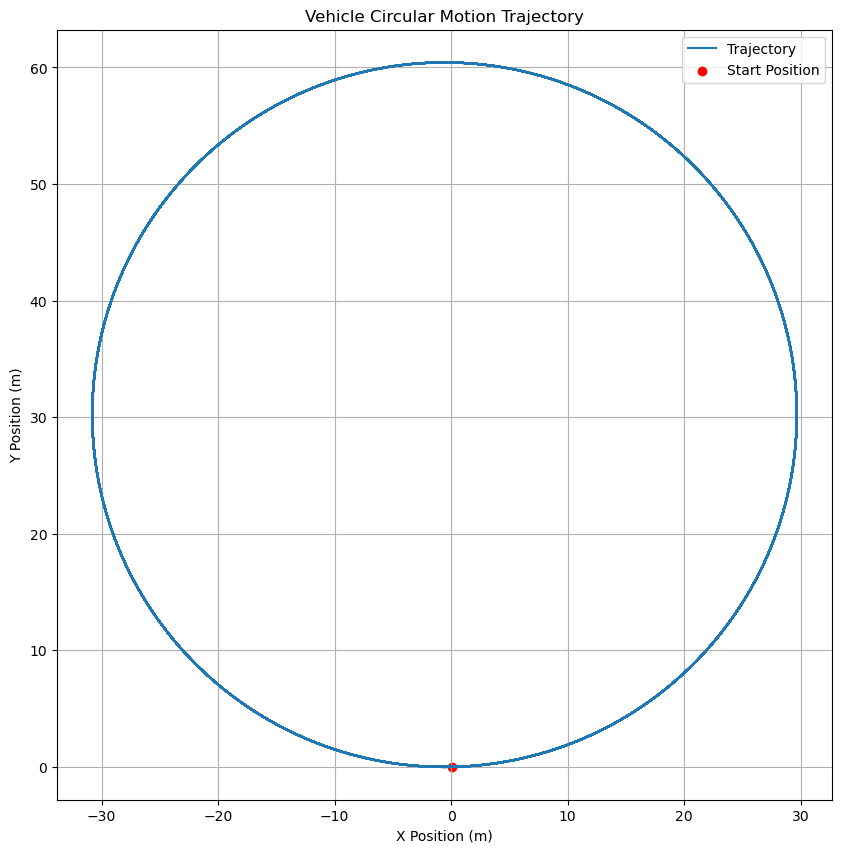

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import math

class Vehicle:
    def __init__(self, x, y, delta, vel, dt):
        self.vel = vel
        self.x = x
        self.y = y
        self.delta = delta
        self.dt = dt
        self.beta = 0 
        self.r = 0  
        self.yaw = 0  


        self.length = 2.338
        self.width = 1.381
        self.rear_to_wheel = 0.339
        self.wheel_length = 0.531
        self.wheel_width = 0.125
        self.track = 1.094
        self.wheel_base = 1.686
        self.Caf = 2*32857.5
        self.Car = 2*32857.5
        self.mass = 633
        self.lf = 0.9442
        self.lr = 0.7417
        self.Iz = 430.166


    
    def Motion_model(self):
        def deg_to_rad(deg):
            return deg * math.pi / 180
        
        coefficient_A = np.array([
            [-1*(self.Caf + self.Car) / (self.mass * self.vel), ((self.Car * self.lr - self.Caf * self.lf) / (self.mass * self.vel**2)) - 1],
            [(self.Car * self.lr - self.Caf * self.lf) / self.Iz, -(self.Caf * self.lf**2 + self.Car * self.lr**2) / (self.Iz * self.vel)]
        ])
        
        state_vector = np.array([[self.beta], [self.r]])

        coefficient_B = np.array([
            [self.Caf / (self.mass * self.vel)],
            [self.Caf * self.lf / self.Iz]
        ])

        control_matrix = np.array([[self.delta]])
        
        output_matrix = np.dot(coefficient_A, state_vector) + np.dot(coefficient_B, control_matrix)

        beta_dot = output_matrix[0][0]
        r_dot = output_matrix[1][0]

        self.beta += beta_dot * self.dt
        self.r += r_dot * self.dt
        self.yaw += self.r * self.dt


        
        if self.yaw > 180:
            self.yaw -= 360
        elif self.yaw < -180:
            self.yaw += 360

        #self.beta = np.mod(self.beta + np.pi, 2 * np.pi) - np.pi

        #self.r = np.mod(self.r + np.pi, 2 * np.pi) - np.pi
        #self.yaw = np.mod(self.yaw + np.pi, 2 * np.pi) - np.pi


        x_dot = self.vel * math.cos(deg_to_rad(self.yaw + self.beta))
        y_dot = self.vel * math.sin(deg_to_rad(self.yaw + self.beta))
        self.x += x_dot * self.dt
        self.y += y_dot * self.dt

def simulate_vehicle():
    x_init = 0
    y_init = 0
    delta = np.radians(180)
    vel = 5
    dt = 0.01
    total_time = 1000
    
    vehicle = Vehicle(x_init, y_init, delta, vel, dt)
    
    x_positions = []
    y_positions = []
    
    for _ in np.arange(0, total_time, dt):
        vehicle.Motion_model()
        x_positions.append(vehicle.x)
        y_positions.append(vehicle.y)
    
    plt.figure(figsize=(10, 10))
    plt.plot(x_positions, y_positions, label="Trajectory")
    plt.scatter(x_positions[0], y_positions[0], color='red', label="Start Position")
    plt.title("Vehicle Circular Motion Trajectory")
    plt.xlabel("X Position (m)")
    plt.ylabel("Y Position (m)")
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

simulate_vehicle()